# Manuel Grau Roldán    
# Luis Nates Arechavaleta    

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

import funciones_auxiliares #Para poder llamar a una serie de funciones ya escritas en un archivo py


Primero cargamos los datos en un DataFrame

In [64]:
pd_loan=pd.read_csv('pd_data_initial_preprocessing.csv').drop(["id",'emp_title', "url", "zip_code"],axis=1)
pd_loan

C:\Users\lolo\AppData\Local\Temp/ipykernel_10780/2381297441.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
0,NaN,NaN,NaN,NaN,55.0,1.0,2315.0,0.0,0.0,0.0,...,w,Individual,0.0,0.0,2300.0,0.0,381.0,4.0,9.0,1985.0
1,NaN,69.0,NaN,26.0,94.0,0.0,1962.0,6.0,2.0,1.0,...,w,Individual,0.0,0.0,16000.0,7.0,300.0,9.0,6.0,1992.0
2,NaN,NaN,NaN,10.0,45.0,1.0,1950.0,5.0,1.0,0.0,...,w,Individual,0.0,0.0,6025.0,2.0,180.0,11.0,6.0,2002.0
3,NaN,95.0,NaN,6.0,60.0,1.0,4240.0,1.0,1.0,10.0,...,w,Individual,0.0,0.0,20400.0,0.0,125.0,15.0,1.0,2007.0
4,NaN,72.0,26.0,127.0,78.0,0.0,2996.0,0.0,0.0,1.0,...,w,Individual,0.0,0.0,13000.0,1.0,184.0,5.0,2.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884879,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,w,Individual,1.0,1.0,13000.0,0.0,108.0,9.0,9.0,2003.0
884880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,w,Individual,0.0,0.0,12000.0,0.0,83.0,17.0,10.0,2003.0
884881,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,Individual,1.0,0.0,20000.0,0.0,155.0,8.0,12.0,2001.0
884882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
pd_loan.drop( pd_loan.tail(2).index,inplace=True)


Observamos que los dos ultimos datos tienen datos muy extraños, los eliminamos.
En caso de ser necesario volveriamos aquí para verlos.

In [66]:
pd_loan.head(5).T 

,0,1,2,3,4
mths_since_last_record,NaN,NaN,NaN,NaN,NaN
il_util,NaN,69.0,NaN,95.0,72.0
mths_since_recent_bc_dlq,NaN,NaN,NaN,NaN,26.0
mths_since_rcnt_il,NaN,26.0,10.0,6.0,127.0
all_util,55.0,94.0,45.0,60.0,78.0
inq_fi,1.0,0.0,1.0,1.0,0.0
max_bal_bc,2315.0,1962.0,1950.0,4240.0,2996.0
total_cu_tl,0.0,6.0,5.0,1.0,0.0
open_acc_6m,0.0,2.0,1.0,1.0,0.0
open_act_il,0.0,1.0,0.0,10.0,1.0


Vemos la información de la variable objetivo

In [67]:
pd_plot_loan_status_count=pd_loan['loan_status'].value_counts().reset_index() #Para el conteo absoluto
pd_plot_loan_status_percent=pd_loan['loan_status'].value_counts(normalize=True)\
                .mul(100).rename('percent').reset_index() #Para el porcentaje
#Juntamos ambas en una misma tabla
pd_plot_loan_status=pd.merge(pd_plot_loan_status_count,pd_plot_loan_status_percent)
pd_plot_loan_status

,index,loan_status,percent
0,Current,422685,47.767710
1,Fully Paid,345520,39.047279
2,Charged Off,97047,10.967299
3,Late (31-120 days),11168,1.262098
4,In Grace Period,5507,0.622347
5,Late (16-30 days),2915,0.329425
6,Default,34,0.003842


# 1 Análisis descriptivo de los datos. 

Antes de analizar los datos, dado que nos vamos a centrar en predecir si se va a pagar, no nos interesan los datos de los clientes que aún no han terminado de pagar, es decir un clinete que se ha retrasado 1 mes en el pago puede que llegue a saldar su deuda, por ello nos vamos a restringir a dichos casos.

Primero necesito crear un pd con solo dos categorías en loan_status: Fully Pais y Charged Off

In [68]:
pd_loan = pd_loan[(pd_loan['loan_status']=='Fully Paid') | 
                  (pd_loan['loan_status']=='Charged Off')]

Vemos la forma de los datos

In [69]:
pd_loan.shape

(442567, 47)

## A. Cantidad de valores nulos.

Analizamos cual es el porcentaje de valores nulos:

In [70]:
missing=pd_loan.isna().mean()
missing

mths_since_last_record            0.812372
il_util                           0.951273
mths_since_recent_bc_dlq          0.738062
mths_since_rcnt_il                0.945267
all_util                          0.944006
inq_fi                            0.943999
max_bal_bc                        0.943999
total_cu_tl                       0.943999
open_acc_6m                       0.943999
open_act_il                       0.943999
open_il_12m                       0.943999
total_bal_il                      0.943999
open_rv_12m                       0.943999
open_rv_24m                       0.943999
open_il_24m                       0.943999
inq_last_12m                      0.943999
mths_since_last_major_derog       0.706553
mths_since_recent_revol_delinq    0.640341
mths_since_last_delinq            0.487339
emp_length                        0.053944
mo_sin_old_il_acct                0.028651
revol_util                        0.000484
dti                               0.000041
verificatio

Hay una gran cantidad de variables con una gran cantidad de missings tanto en en los pagados como en los charged off, imputarlos podría suponer un problema, veremos en el punto dos cómo son las variables para ver que podemos hacer con ellas.

## B.	Tipo de variables.

Veamos de qué tipos son las variables a estudiar

In [93]:
pd_loan.dtypes

dtype('bool')

Sabemos que hay variables enteras que no se han importado como tal por tener nan.

Creamos tres listas unas con las variables continuas , otra con las variables categoricas y otra con la variables enteras

In [72]:
list_var_continuous = list(pd_loan.select_dtypes('float').columns)
list_var_discrets = list(pd_loan.select_dtypes('O').columns)

In [73]:
list_var_int=[]
list_var_float=[]
for col in list_var_continuous:
    if (pd_loan[col]%1).sum()==0:
        list_var_int.append(col)
    else:
        list_var_float.append(col)
list_var_int

['mths_since_last_record',
 'il_util',
 'mths_since_recent_bc_dlq',
 'mths_since_rcnt_il',
 'all_util',
 'inq_fi',
 'max_bal_bc',
 'total_cu_tl',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'open_il_24m',
 'inq_last_12m',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'mths_since_last_delinq',
 'emp_length',
 'mo_sin_old_il_acct',
 'sub_grade',
 'term',
 'total_acc',
 'fico_range_low',
 'fico_range_high',
 'pub_rec',
 'pub_rec_bankruptcies',
 'loan_amnt',
 'mort_acc',
 'mo_sin_old_rev_tl_op',
 'open_acc',
 'earliest_cr_line_month',
 'earliest_cr_line_year']

In [74]:
pd_loan[list_var_float]

,revol_util,dti,annual_inc,int_rate,installment
8,22.7,16.99,153000.0,7.35,359.26
10,98.9,6.07,50000.0,24.85,285.70
24,27.2,13.12,110000.0,7.35,232.79
42,20.0,10.11,51979.0,16.02,243.29
91,90.0,10.86,75000.0,16.02,492.34
...,...,...,...,...,...
884875,65.0,27.08,25400.0,15.59,404.61
884876,69.7,23.69,63000.0,11.99,398.52
884879,61.3,30.90,35000.0,15.99,316.07
884880,30.6,27.19,64400.0,19.99,317.86


## C) distribución de los valores de la variable objetivo.

Realizamos un histograma y comparamos datos para comprobar cómo de desvalanceados están los datos que vamos a analizar.

Para el conteo absoluto:

In [75]:
pd_plot_loan_status_count=pd_loan['loan_status'].value_counts().reset_index() 

Para el porcentaje:

In [76]:
pd_plot_loan_status_percent=pd_loan['loan_status'].value_counts(normalize=True)\
                .mul(100).rename('percent').reset_index() 

Los unimos:

In [77]:
pd_plot_loan_status=pd.merge(pd_plot_loan_status_count,pd_plot_loan_status_percent)

Hacemos el histograma. 

In [78]:
fig = px.histogram(pd_plot_loan_status, x="index", y=['percent'])
fig.show()

In [79]:
pd_plot_loan_status_count

,index,loan_status
0,Fully Paid,345520
1,Charged Off,97047


Observamos hay una gran diferencia de tamaños, una forma de solventarlo dado que tenemos muchos datos es eliminar de forma aleatoria 345520-97047 datos de las personas que saldaron la deuda(undersampling).

Parece que están bastante desvalanceados haremos un valanceo en los puntos siguientes

## D)Matriz de correlación en variables continuas.

Para ello deberemos hacer uso de las funciones auxiliares que nos ayudarán a calcular la matriz de correlaciones de las variables continuas.

Importamos todos los datos con los posibles estados

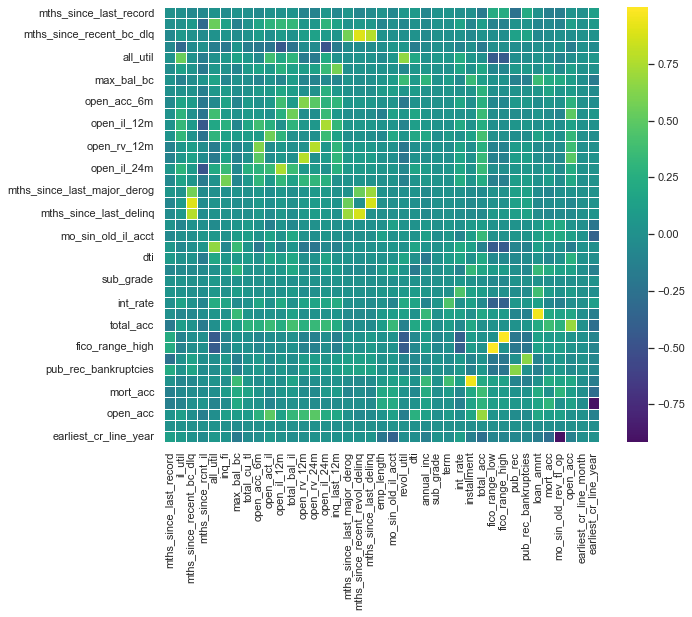

0

In [80]:
funciones_auxiliares.get_corr_matrix(dataset = pd_loan[list_var_continuous], 
                metodo='pearson', size_figure=[10,8])

Eliminaremos variables que tienen alta correlación con otras que si dejaremos:

In [81]:
pd_loan.drop(['mo_sin_old_rev_tl_op','fico_range_low','open_rv_12m','open_il_12m','earliest_cr_line_year'],1)

C:\Users\lolo\AppData\Local\Temp/ipykernel_10780/1557204909.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,...,addr_state,fico_range_high,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,open_acc,earliest_cr_line_month
8,84.0,63.0,NaN,27.0,36.0,1.0,1581.0,6.0,1.0,1.0,...,CA,724.0,w,Individual,1.0,1.0,11575.0,2.0,20.0,7.0
10,NaN,51.0,NaN,21.0,74.0,0.0,2779.0,0.0,0.0,1.0,...,WA,689.0,w,Individual,0.0,0.0,7200.0,0.0,4.0,1.0
24,NaN,70.0,NaN,7.0,39.0,6.0,5965.0,8.0,1.0,4.0,...,TX,714.0,w,Individual,0.0,0.0,7500.0,4.0,19.0,3.0
42,55.0,95.0,NaN,9.0,32.0,0.0,3898.0,0.0,1.0,1.0,...,CA,694.0,w,Individual,2.0,2.0,10000.0,0.0,15.0,8.0
91,NaN,82.0,NaN,7.0,83.0,3.0,2700.0,0.0,1.0,2.0,...,MA,689.0,w,Individual,0.0,0.0,14000.0,1.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,684.0,f,Individual,0.0,0.0,11575.0,0.0,9.0,7.0
884876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,OH,689.0,f,Individual,0.0,0.0,12000.0,1.0,13.0,6.0
884879,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TN,684.0,w,Individual,1.0,1.0,13000.0,0.0,9.0,9.0
884880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MA,699.0,w,Individual,0.0,0.0,12000.0,0.0,17.0,10.0


# 2. Valores missing

comprobamos los valores missing que tienen las variables categoricas

In [82]:
missing[list_var_discrets]

verification_status    0.0
home_ownership         0.0
grade                  0.0
loan_status            0.0
purpose                0.0
addr_state             0.0
initial_list_status    0.0
application_type       0.0
dtype: float64

Como no tienen, los dejamos como están, hacemos lo mismo con las variables continuas y las enteras

In [83]:
missing[list_var_int]

mths_since_last_record            0.812372
il_util                           0.951273
mths_since_recent_bc_dlq          0.738062
mths_since_rcnt_il                0.945267
all_util                          0.944006
inq_fi                            0.943999
max_bal_bc                        0.943999
total_cu_tl                       0.943999
open_acc_6m                       0.943999
open_act_il                       0.943999
open_il_12m                       0.943999
total_bal_il                      0.943999
open_rv_12m                       0.943999
open_rv_24m                       0.943999
open_il_24m                       0.943999
inq_last_12m                      0.943999
mths_since_last_major_derog       0.706553
mths_since_recent_revol_delinq    0.640341
mths_since_last_delinq            0.487339
emp_length                        0.053944
mo_sin_old_il_acct                0.028651
sub_grade                         0.000000
term                              0.000000
total_acc  

In [84]:
missing[list_var_float]

revol_util     0.000484
dti            0.000041
annual_inc     0.000000
int_rate       0.000000
installment    0.000000
dtype: float64

Primero haremos una imputación manual sobre las variables enteras que lo necesiten transformandolas posteriormente a enteros.

Para las variables:
mths_since_rcnt_il,    
mths_since_last_record,   
mths_since_recent_bc_dlq,    
mths_since_last_major_derog,  
mths_since_last_delinq,  
mo_sin_old_il_acct,   
mths_since_recent_revol_delinq.

Escogeremos asignar a los nan datos muy elevados ya que suelen ser valores de cantidad de meses sin haber cometido un delito o abrirse cuentas, así que si no pasa podemos asignarles valores elevados a la hora de hacer cálculos y lo interpretará como que llevan medio siglo sin cometer delitos o abrirse cuentas.

In [85]:
listremove=list_var_int.copy()
lista=['mths_since_last_record', 
'mths_since_recent_bc_dlq', 
'mths_since_last_major_derog', 
'mths_since_last_delinq', 
'mo_sin_old_il_acct',
'mths_since_rcnt_il',
'mths_since_recent_revol_delinq']
for i in lista:
    listremove.remove(i)
pd_loan[lista]=pd_loan[lista].fillna(500)

C:\Users\lolo\AppData\Local\Temp/ipykernel_10780/2272314355.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Para las variables:    
open_act_il,  
open_acc_6m,  
open_il_12m,  
open_rv_12m,  
open_il_24m,  
open_rv_24m,
total_cu_tl,  
inq_fi,   
inq_last_12m,  
emp_length.  

Son datos sobre cuentas abiertas, si no tiene datos lo dejaremos a 0, es decir supondremos que no se han abierto una cuenta

In [86]:
lista=['open_acc_6m',
'open_il_12m',
'open_rv_12m',
'open_il_24m',  
'open_rv_24m' ,
'open_act_il',
'total_cu_tl',
'inq_fi', 
'inq_last_12m',
'emp_length']
for i in lista:
    listremove.remove(i)
pd_loan[lista]=pd_loan[lista].fillna(0)

C:\Users\lolo\AppData\Local\Temp/ipykernel_10780/859673671.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Las demás variables las imputaremos.

In [87]:
from sklearn.impute import SimpleImputer
#from sklearn.impute import KNNImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer =KNNImputer(n_neighbors=10, weights='uniform')

imputer.fit(pd_loan[list_var_continuous])
#imputer.transform(pd_loan[list_var_continuous])
pd_loan[list_var_continuous]=imputer.transform(pd_loan[list_var_continuous])

C:\Users\lolo\AppData\Local\Temp/ipykernel_10780/1696139643.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Transformamos las variables enteras en int.

In [88]:
pd_loan[list_var_int]=pd_loan[list_var_int].astype(int)

C:\Users\lolo\AppData\Local\Temp/ipykernel_10780/4174253711.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 3. Transformar las variables continuas.

Codificamos la variables categóricas

In [89]:
y=pd_loan['loan_status']
y=y.replace({'Charged Off':0,'Fully Paid':1}).astype(bool)#True ha pagado, false no
pd_loan=pd_loan.drop('loan_status',axis=1)
list_var_discrets.remove('loan_status')

In [90]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
for col in list_var_discrets:
    label_encoder = enc.fit(pd_loan[col])
    pd_loan[col] = label_encoder.transform(pd_loan[col]) + 1

Normalizamos los datos 

In [91]:
from sklearn import preprocessing
scaler = preprocessing.scale(pd_loan[list_var_continuous], axis=0, with_mean=True, with_std=True, copy=True)

pd_loan[list_var_continuous] = scaler

# 4. Partición del conjunto de entrenamiento.

Haremos un balanceo de la variable objetivo que tal y como vimos estaba muy desbalanceada, dado que tenemos una gran cantidad de datos haremos un undersampling a la clase mayoritaria para que el ordenador pueda manejarlo.

In [30]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics.pairwise import euclidean_distances

#samply = RandomOverSampler(sampling_strategy='minority',random_state = 0)

samply = RandomUnderSampler(random_state = 0)
X , y = samply.fit_resample(pd_loan,y)


Generamos los conjuntos de entrenamiento y de test:

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

ValueError: Found input variables with inconsistent numbers of samples: [194094, 442567]

# 5.	Evaluación diferentes algoritmos de clasificación.

#### Definamos una función que ayude a tomar todas las normas en cada diseño basado en un algoritmo

In [33]:
def todas_metricas(X_train, X_test, y_pred, y_test):
    from sklearn import metrics
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import confusion_matrix
    
    confmat = confusion_matrix(y_test,y_pred) #Matriz de confusión
    funciones_auxiliares.plot_confusion_matrix(confmat)
    
    ejex, ejey, _ = roc_curve(y_test, y_pred) #Curva Roc
    roc_auc = auc(ejex, ejey)

    plt.figure()
    plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

    plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])

    plt.xlabel('FPR (1-ESP)')
    plt.ylabel('SEN')
    plt.legend(loc="lower right")
    plt.show()
    
    funciones_auxiliares.calcula_metricas(confmat) #Accuracy, Precision,True negative rate, Recall, F-Score
    return confmat

### A.	Regresión logística 

In [100]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, C = 1)
model_glm = clf.fit(X_train, y_train)
y_pred = model_glm.predict_proba(X_test)
y_pred_def=[]
for i in y_pred:
    if i[0]<0.5:
        y_pred_def.append(1)
    else:
        y_pred_def.append(0)
y_pred_reg=y_pred_def

C:\Users\lolo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



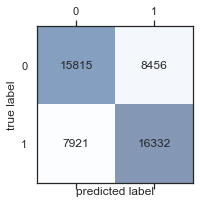

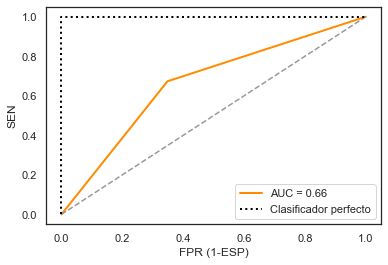

ACC:  0.6624969087461875
SEN:  0.6734012287139736
ESP:  0.6516006757035144
PPV:  0.6588671938034533
FSC:  0.6660549336269651


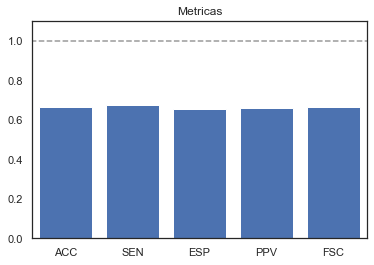

In [101]:
reg_mat=todas_metricas(X_train, X_test, y_pred_reg, y_test)

### B.	K-NN 

Usaremos solo las variables continuas por ser muy costoso computacionalmente.

In [36]:
def which_k(X_train,X_test,y_train,y_pred,a,b):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    ks = list(range(a,b))
    accs={}
    for k in ks:
        print(k)
        # Definimos el modelo con el valor de hiperparámetro correspondiente
        knn = KNeighborsClassifier(n_neighbors=k)

        # Ajustamos a los datos de entrenamiento
        knn.fit(X_train, y_train)

        # Hacemos predicciones sobre los datos de test
        y_pred = knn.predict(X_test)

        # Evaluamos y guardamos la métrica correspondiente (en este caso accuracy)
        acc =accuracy_score(y_test, y_pred)
        print(acc)
        accs[k] = acc
    return accs

Comentamos la función por ser computacionalmente costosa pero abajo ponemos nuestros resultados.

In [37]:
#which_k(X_train[list_var_continuous],X_test[list_var_continuous],y_train,y_pred,9,17)

9  
0.6224548676943368  
10   
0.6203115983843047        
11    
0.6241859698293628     
12   
0.6238768444481082     
13   
0.6275657406644135    
14   
0.6276069573819141     
15   
0.6305127359657077   
16   
0.6304509108894568     
150     
0.6494312092984915   
300   
0.6504822355947573   
1000   
0.6505646690297585   
1001   
0.6502555436485038   
2000   
0.6497815513972467   

Explorar es computacionalmente costoso y no poseemos ordenadores lo suficientemente potentes, por lo que nos quedamos con el que mejor accuraci saca de las prueba que hemos hecho k=1000.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1000)

In [39]:
#knn.fit(X_train[list_var_continuous], y_train)
#y_pred_knn=knn.predict(X_test[list_var_continuous])

In [40]:
knn_mat=todas_metricas(X_train[list_var_continuous], X_test[list_var_continuous], y_pred_knn, y_test)

NameError: name 'y_pred_knn' is not defined

### C.	Arbol de decisión simple 

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
def which_k_tree(X_train,X_test,y_train,y_pred,a,b):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    ks = list(range(a,b))
    accs={}
    for k in ks:
        print(k)
        # Definimos el modelo con el valor de hiperparámetro correspondiente
        arbol = DecisionTreeClassifier(max_depth=k)
        

        # Ajustamos a los datos de entrenamiento
        arbol.fit(X_train[list_var_continuous],y_train)

        # Hacemos predicciones sobre los datos de test
        y_pred= arbol.predict(X_test[list_var_continuous])

        # Evaluamos y guardamos la métrica correspondiente (en este caso accuracy)
        acc =accuracy_score(y_test, y_pred)
        print(acc)
        accs[k] = acc
    return accs

In [99]:
which_k_tree(X_train,X_test,y_train,y_pred,1,10)

1
0.6271123567719067
2
0.6271123567719067
3
0.6329033055807436
4
0.6446088533509191
5
0.6445676366334185
6
0.6468757728134531
7
0.650337977083505
8
0.6493693842222406
9
0.6494106009397411


{1: 0.6271123567719067,
 2: 0.6271123567719067,
 3: 0.6329033055807436,
 4: 0.6446088533509191,
 5: 0.6445676366334185,
 6: 0.6468757728134531,
 7: 0.650337977083505,
 8: 0.6493693842222406,
 9: 0.6494106009397411}

Observamos que k=7 parece ser el mejor modelo

In [45]:
arbol = DecisionTreeClassifier(max_depth=7)
arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [46]:
y_pred_tree= arbol.predict(X_test)

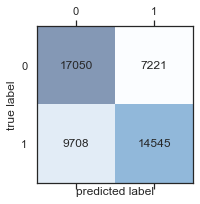

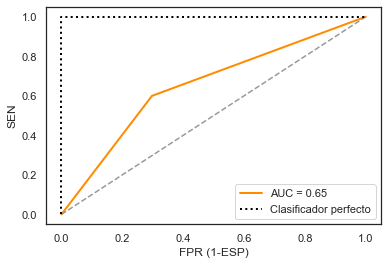

ACC:  0.6511210947160169
SEN:  0.5997196223147652
ESP:  0.7024844464587368
PPV:  0.6682440503537628
FSC:  0.6321302070883765


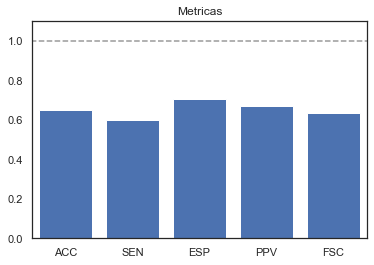

In [47]:
wood_mat=todas_metricas(X_train, X_test,y_pred_tree, y_test)

### D. Random forest.

Como en el árbol de decision tuvimos una profundidad de 7 en el random forest necesitaremos menos ,  ajustaremos un random forest con k=7 ya que tenemos muchas variables.

In [124]:
from sklearn.ensemble import RandomForestRegressor
bosque = RandomForestRegressor(max_depth=7)

In [125]:
bosque.fit(X_train[list_var_continuous],y_train)

RandomForestRegressor(max_depth=7)

Predecimos los datos de test y comparamos.

In [128]:
y_pred_wood= bosque.predict(X_test[list_var_continuous])
y_pred_def=[]
for i in y_pred_wood:
    if i<0.5:
        y_pred_def.append(0)
    else:
        y_pred_def.append(1)
y_pred_wood=y_pred_def

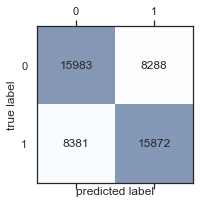

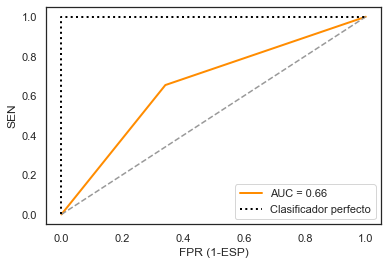

ACC:  0.6564792679910972
SEN:  0.6544345029480889
ESP:  0.6585225165835771
PPV:  0.6569536423841059
FSC:  0.6556916530683907


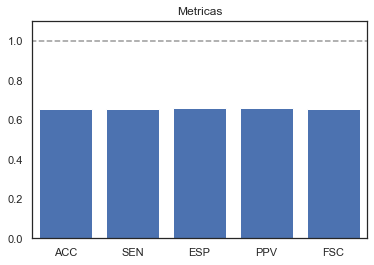

In [129]:
tree_mat=todas_metricas(X_train[list_var_continuous], X_test[list_var_continuous],y_pred_wood, y_test)

vemos que mejora un poco la prediccion respecto al decision tree, pero tampoco mucho

### SVM

Al no tener potencia suficiente, utilizaremos solo las continuas

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



Vamos a reducir el tiempo de computación cogiendo menos datos tanto para el train como para el test

In [ ]:
svmModel= SVC(kernel='linear',probability=True) 
svmModel.fit(X_train[list_var_continuous], y_train)
y_pred_knn=knn.svmModel(X_test[list_var_continuous])
todas_metricas(X_train[list_var_continuous], X_test[list_var_continuous], y_pred_svm, y_test)


Probados todos los tipos de Kernel, el que mejor score proporciona es el 'linear'

In [ ]:
funciones_auxiliares.plot_decision_boundary_svm(X_test,y_test,0.05,svmModel)

Analizemos el SVM para la regresión

In [ ]:
###Tarda demasiado en compilarse
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(X_train, y_train)

# 6.  ¿Cual de todas las métricas crees que es la más conveniente?

La accuracy y F-Score resumen con un solo dato lo bueno que es el modelo y viene bien para hacer un análisis poco exhaustivo , pero se quedan bastante corto , la curva roc puede estar bien, pero la que mejor resume lo bueno que el modelo, es la matriz de confusión, que te resume en que falla y en que no falla, aunque es difícil de comparar con otros modelos.

Ahora ordenaremos por orden los valores de las métricas

### -Accuracy.

Por orden es:

Regresión con:0.6624969087461875  
Decision_tree con:0.6511210947160169  
knn con:0.6505646690297585  

### -F-score.

Por orden es:

Regresión con: 0.6660549336269651  
knn con:0.6511210947160169  
Decision_tree con: 0.6321302070883765

### -Recall.

Por orden es:

knn con:0.6909248340411496
Regresión con: 0.6734012287139736   
Decision_tree con:0.5997196223147652 

### -True negative rate

Por orden es:

Decision_tree con:0.7024844464587368    
Regresión con: 0.6516006757035144  
knn con:0.6102344361583784    

###  -Precision

Por orden es:

Decision_tree con:0.6682440503537628   
Regresión con: 0.6516006757035144  
knn con:0.6588671938034533    

###  -F-score.

Por orden es:
 
Regresión con: 0.6660549336269651     
knn con: 0.6640380424014266     
Decision_tree con:0.6321302070883765      

### Matriz de confusión.

In [ ]:
funciones_auxiliares.plot_confusion_matrix(reg_mat)

In [ ]:
funciones_auxiliares.plot_confusion_matrix(tree_mat)

In [ ]:
funciones_auxiliares.plot_confusion_matrix(knn_mat)

Tras todos los análisis concluimos que pese a que sigue siendo un modelo regulero por fallar tanto, el mejor es el de regresión logística por ser el que suele tener mejores métricas y mejor matriz de confusión.